# Example: Image Compression

This example illustrates the application of Singular Value Decomposition (SVD) for image compression, extracted and modified from Chapter 1 of Brunton & Kutz (2019). The original code, which is presented in Part 2 below, demonstrates image compression in greyscale. In contrast, Part 1 showcases the parallel compression process in RGB scale (i.e., for colorful images).

I particularly favor this application because it leverages matrix theory. The visual effect of the images provides a tangible representation of singular values.

# Part 1: This is for compressing images with colors. You may run a parallel version for images in greyscale and skip the codes in this part.




Saving San_Remo_Coastal_Reserve.jpg to San_Remo_Coastal_Reserve.jpg


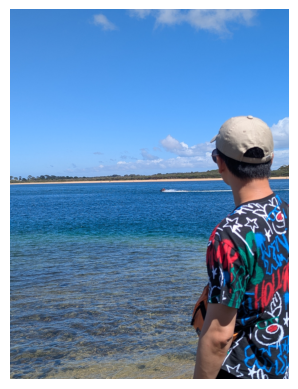

In [ ]:
## upload an image: You will be prompted to select your file

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Upload the image file (you'll need to manually upload in Colab)
from google.colab import files
uploaded = files.upload()

# Get the filename from the uploaded files
image_filename = list(uploaded.keys())[0]

try:
    A = mpimg.imread(image_filename)
    X = np.array(A)

    # Display the image
    plt.imshow(A)
    plt.axis('off')  # Hide axes
    plt.show()

except FileNotFoundError:
    print(f"Error: Image file not found: {image_filename}")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
X.shape

(4080, 3072, 3)

In [18]:
# SVD in numpy. For RGB, the computation is done three times (vs only once in greyscale).

import numpy as np

# Assuming X is defined from the previous code block (image data)
W = np.zeros((nx, nx, 3)) #3rd dimenaional refers to RGB; 0:red, 1:blue, 2, green
Y = np.zeros((ny, 3))
Z = np.zeros((ny, ny, 3))


for k in range(3):
  U, S, V = np.linalg.svd(X[:, :, k])
  W[:, :, k] = U
  Y[:, k] = S
  Z[:, :, k] = V

The analysis of the (cumulative) significance of the singular values is omitted in this RGB version. However, the analysis in greyscale in Part 2 is available below.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

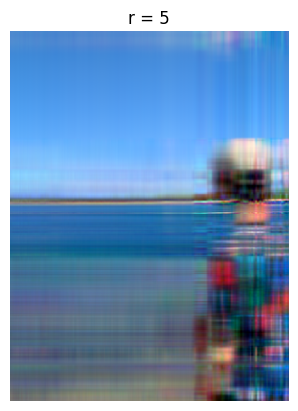

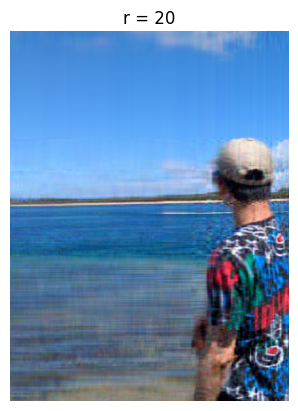

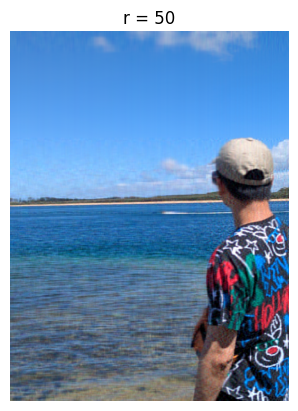

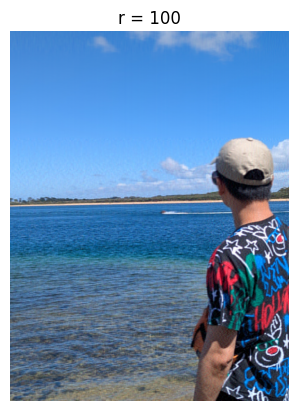

In [19]:
# Approximate the image based on SVD on X
from PIL import Image
# Import the necessary module for downloading files
from google.colab import files

X_approx = np.zeros(X.shape)
for r in [5, 20, 50, 100]:
    for k in range(3):
        D = np.zeros((X[:,:,k].shape[0], X[:,:,k].shape[0]))
        D[:X[:,:,k].shape[1], :X[:,:,k].shape[1]] = np.diag(Y[:,k])
        #print(X_approx.shape)
        X_approx[:,:,k] = W[:, :r, k] @ D[:r, :r] @ Z[:r, :, k]
    X_approx_im = np.clip(X_approx, 0, 255).astype(np.uint8)
    plt.figure()
    plt.imshow(X_approx_im) # Use cmap='gray' colormap for grayscale images
    plt.axis('off')
    plt.title(f'r = {r}')
    # Create a PIL Image object from the NumPy array
    img = Image.fromarray(X_approx_im, mode='RGB')
    # Save the image to a file
    img.save(f'XapproxRGB_r={r}.jpg')
    # Download the image (optional)
    files.download(f'XapproxRGB_r={r}.jpg')

# Part 2: This is for compressing images in greyscale. This reduces the dimension of the photo array. Otherwise we deal with tenors for colors (in Part 1). You may run this part without running Part 1.

Saving San_Remo_Coastal_Reserve.jpg to San_Remo_Coastal_Reserve (1).jpg


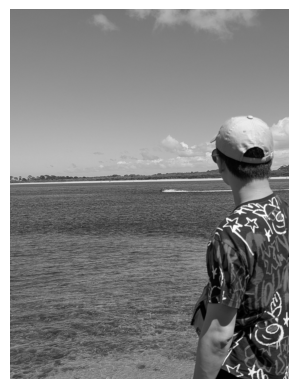

In [20]:
## upload an image: You will be prompted to select your file

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image

# Upload the image file (you'll need to manually upload in Colab)
from google.colab import files
uploaded = files.upload()

# Get the filename from the uploaded files
image_filename = list(uploaded.keys())[0]

try:
    A = mpimg.imread(image_filename)
    X = np.array(Image.fromarray(A).convert('L'))

    # Display the image
    nx, ny = X.shape
    plt.imshow(X, cmap='gray')
    plt.axis('off')  # Hide axes
    plt.show()

except FileNotFoundError:
    print(f"Error: Image file not found: {image_filename}")
except Exception as e:
    print(f"An error occurred: {e}")

In [21]:
# Save the grayscale image, for comparing the size before and after the image compression
img = Image.fromarray(X, mode='L')  # Use 'L' mode for grayscale
img.save('grayscale_image.jpg')

# Download the grayscale image
files.download('grayscale_image.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
# SVD computation

U, S, V = np.linalg.svd(X)
print("U:\n", U)
print("\nS:\n", S)
print("\nV:\n", V)

U:
 [[-0.01702637 -0.0146482   0.01610746 ... -0.03033061  0.00746038
  -0.00814708]
 [-0.01702317 -0.01462293  0.01616579 ...  0.00240348  0.04389152
   0.00507781]
 [-0.01701952 -0.01455611  0.01624908 ...  0.00783423 -0.01920318
   0.04323417]
 ...
 [-0.01346645  0.02155961 -0.03182434 ...  0.05689977 -0.05068888
   0.01694709]
 [-0.01343707  0.02193078 -0.03112849 ... -0.04248004  0.06192307
  -0.03991588]
 [-0.01338677  0.02213986 -0.03060626 ...  0.01402144 -0.02997292
   0.02166641]]

S:
 [4.39504642e+05 6.16112140e+04 3.10180248e+04 ... 1.09149990e+00
 1.05848478e+00 1.03917285e+00]

V:
 [[-0.01856184 -0.01856012 -0.01853471 ... -0.01776222 -0.01770012
  -0.01765315]
 [ 0.00691398  0.00694464  0.00690748 ... -0.00650405 -0.00753074
  -0.00804283]
 [-0.00418372 -0.00397018 -0.00376926 ... -0.02113886 -0.02013837
  -0.01970738]
 ...
 [ 0.01251395 -0.0203169   0.01900088 ... -0.03347175  0.02287414
  -0.00739597]
 [ 0.00156977 -0.01121971  0.01698229 ...  0.00392293  0.00125084
  

In [23]:
#the vector of the singular values
S.shape

(3072,)

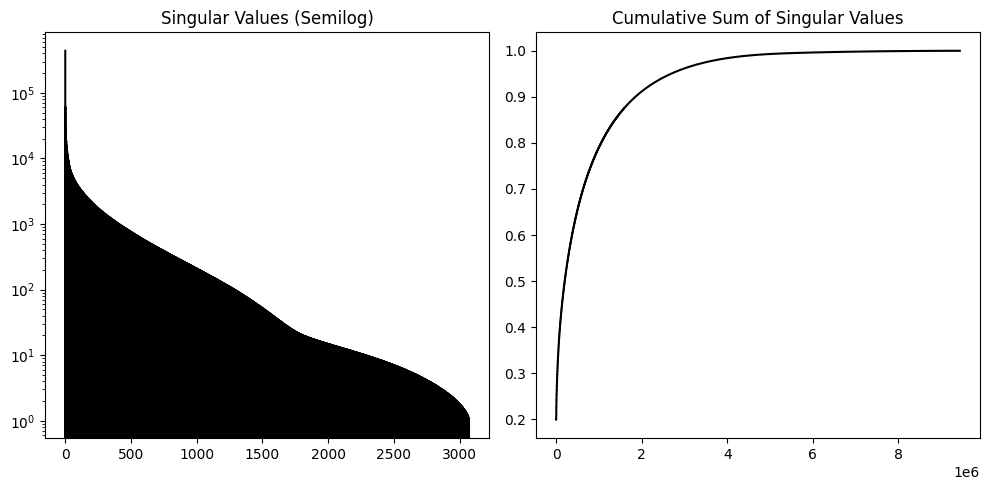

In [24]:
# Analyze the (cumulative) significance of the singular values

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))  # Adjust figure size as needed

plt.subplot(1, 2, 1)
plt.semilogy(np.diag(S), 'k')
plt.title('Singular Values (Semilog)')

plt.subplot(1, 2, 2)
plt.plot(np.cumsum(np.diag(S)) / np.sum(np.diag(S)), 'k')
plt.title('Cumulative Sum of Singular Values')

plt.tight_layout() # Adjust subplot params for a tight layout
plt.show()

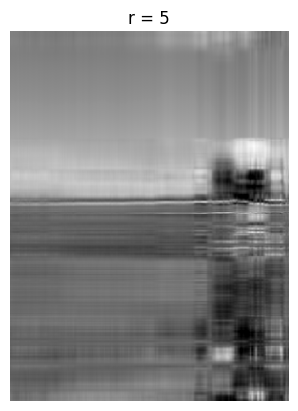

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

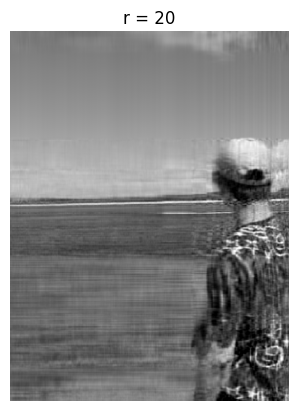

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

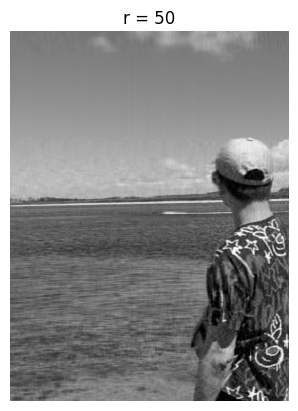

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

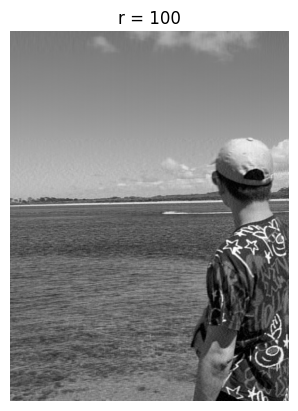

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

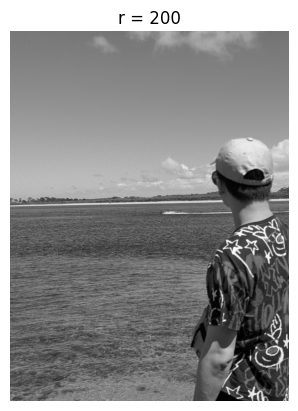

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
## Compare the quality of the image based on cumulative number (r) of singular values
for r in [5, 20, 50, 100, 200]:
    # Truncation value, make sure r is not bigger than the minimum dimension of X
    r = min(r, min(X.shape))
    S_r = np.zeros((X.shape[1], X.shape[1]))
    S_r[:X.shape[0], :X.shape[0]] = np.diag(S)
    Xapprox = U[:, :r] @ S_r[:r, :r] @ V[:r, :]

    # Convert Xapprox to a displayable image
    # Ensure Xapprox has the correct data type and range for image display
    Xapprox_im = np.clip(Xapprox, 0, 255).astype(np.uint8)

    # Create a PIL Image object from the NumPy array
    img = Image.fromarray(Xapprox_im, mode='L')

    # Now you can work with the 'img' object, e.g., save or display the image
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f'r = {r}')
    plt.show()

    # Save the image to a file
    img.save(f'Xapprox_r={r}.jpg')

    # Download the image (optional)
    files.download(f'Xapprox_r={r}.jpg')

# **Reference**

Brunton, S. L., & Kutz, J. N. (2019). Data driven science & engineering: Machine learning, dynamical systems, and control. Cambridge University Press.